In [82]:
sc.version

2.4.4

# TRANSFORMATIONS 
Essential Core & Intermediate Spark Operations
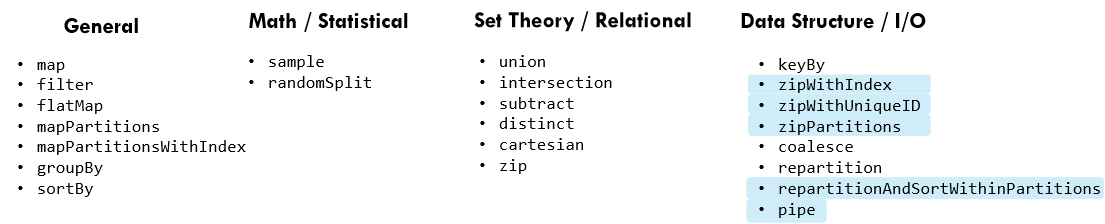

# ACTIONS
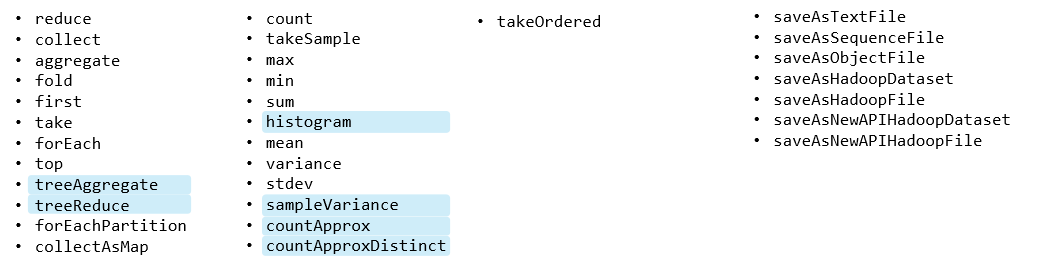

In [77]:
import org.apache.spark.SparkContext
import org.apache.spark.SparkConf
import org.apache.spark.sql.SparkSession

# MAP
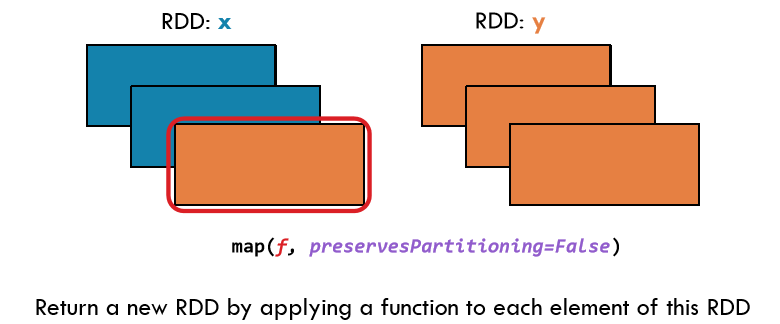


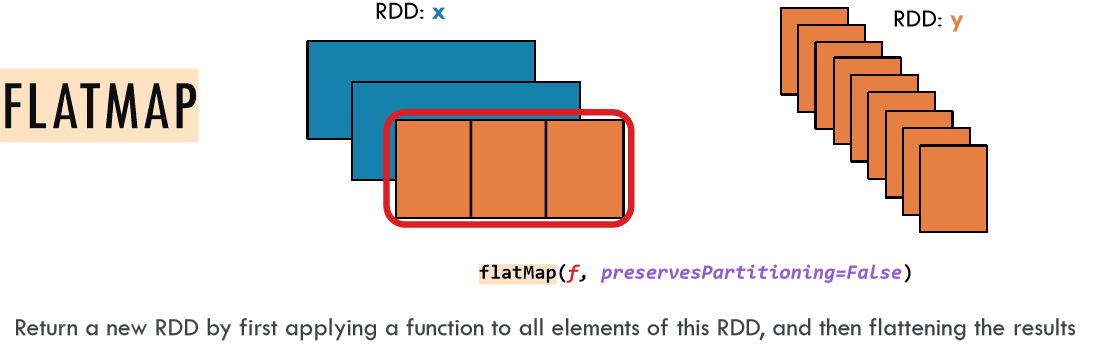

In [38]:
val rdd =sc.parallelize(List("b","a","c"))  //List 
//Map
val res = rdd.map{x=>(x,1)}
println(rdd.collect().mkString(", "))
println(res.collect().mkString(", "))
//res.collect()

b, a, c
(b,1), (a,1), (c,1)


rdd = ParallelCollectionRDD[30] at parallelize at <console>:39
res = MapPartitionsRDD[31] at map at <console>:40


MapPartitionsRDD[31] at map at <console>:40

In [37]:
val rdd = sc.parallelize(Array("a","b","c"))  //Array
//Map
val res=rdd.map{x=>(x,1)}
println(rdd.collect().mkString(", "))
println(res.collect().mkString(", "))

//res.collect()

a, b, c
(a,1), (b,1), (c,1)


rdd = ParallelCollectionRDD[28] at parallelize at <console>:39
res = MapPartitionsRDD[29] at map at <console>:40


MapPartitionsRDD[29] at map at <console>:40

In [50]:
val data =sc.textFile("sample.txt")    //reading file
println(data.collect.mkString(", "))
//length 
val rdd = data.map{lines=>(lines,lines.length)} 
println(rdd.collect.mkString(", "))
//splitting by space
val res = data.map{x=>x.split(" ")}
res.collect()

Map Return a new RDD by applying a function to each element of this RDD
(Map Return a new RDD by applying a function to each element of this RDD,71)


data = sample.txt MapPartitionsRDD[66] at textFile at <console>:40
rdd = MapPartitionsRDD[67] at map at <console>:43
res = MapPartitionsRDD[68] at map at <console>:46


Array(Array(Map, Return, a, new, RDD, by, applying, a, function, to, each, element, of, this, RDD))

In [74]:

// List of Integers
val listToBeFlatten: List[Int] = {List(1, 2, 3, 4)} 

//function, precisely the simple lambda
val addSubUnity = (x: Int) => {List(x - 1, x + 1)}

//flatMap
val flatMap=listToBeFlatten.flatMap(addSubUnity)
println("flatMap:"+flatMap)

//Map
val map=listToBeFlatten.map(addSubUnity)
println("map:"+map)


flatMap:List(0, 2, 1, 3, 2, 4, 3, 5)
map:List(List(0, 2), List(1, 3), List(2, 4), List(3, 5))


listToBeFlatten = List(1, 2, 3, 4)
addSubUnity = > List[Int] = <function1>
flatMap = List(0, 2, 1, 3, 2, 4, 3, 5)
map = List(List(0, 2), List(1, 3), List(2, 4), List(3, 5))


List(List(0, 2), List(1, 3), List(2, 4), List(3, 5))

In [83]:
val rdd = sc.parallelize(Array(1,2,3)) 
//flatMap
val result = rdd.flatMap(n => Array(n, n*100, 42)) 
println(rdd.collect().mkString(", ")) 
println(result.collect().mkString(", "))

1, 2, 3
1, 100, 42, 2, 200, 42, 3, 300, 42


rdd = ParallelCollectionRDD[69] at parallelize at <console>:41
result = MapPartitionsRDD[70] at flatMap at <console>:42


MapPartitionsRDD[70] at flatMap at <console>:42

In [92]:
val data =sc.textFile("sample.txt")    //reading file
println(data.collect.mkString(", "))
//length 
val rdd = data.flatMap{lines=>lines.split("
")}
println(rdd.collect.mkString(", "))
val rs=rdd.map{x=>(x,1)}
rs.collect()


Map Return a new RDD by applying a function to each element of this RDD
Map, Return, a, new, RDD, by, applying, a, function, to, each, element, of, this, RDD


data = sample.txt MapPartitionsRDD[90] at textFile at <console>:43
rdd = MapPartitionsRDD[91] at flatMap at <console>:46
rs = MapPartitionsRDD[92] at map at <console>:48


Array((Map,1), (Return,1), (a,1), (new,1), (RDD,1), (by,1), (applying,1), (a,1), (function,1), (to,1), (each,1), (element,1), (of,1), (this,1), (RDD,1))

# Functional Programming 
## map and flatMap in Scala for collections

In [93]:
case class CustomMaps[T, U](list: List[T]) {
  def customMap(f: T => U): List[U] = {
    val initialList = List.empty[U]

    def customMapHelper(in: List[T], out: List[U]): List[U] = {
      in match {
        case Nil => out
        case head :: Nil => f(head) :: out
        case head :: tail => customMapHelper(tail, f(head) :: out)
      }
    }
    customMapHelper(list, initialList) reverse
  }

  def customFlatMap(f: T => List[U]): List[U] = {
    val initialList = List.empty[U]
    def customFlatMapHelper(in: List[T], out: List[U]): List[U] = {
      in match {
        case Nil => out
        case head :: Nil => out ::: f(head)
        case head :: tail => customFlatMapHelper(tail, out ::: f(head))
      }
    }
    customFlatMapHelper(list, initialList)
  }
}

defined class CustomMaps


In [95]:
val list = (1 to 5).toList //List of integers

  val customMapsObject = CustomMaps[Int, Int](list) //Instantiating a CustomMaps Object

  val mapLambda = (x: Int) => x * 2 //A lambda for customMap method

  val addSubUnity = (x: Int) => List(x - 1, x + 1) //another a lambda for flatMap method

  //using custom map
  val mapResult = customMapsObject.customMap(mapLambda)

  //using custom flatMap
  val flatMapResult = customMapsObject.customFlatMap(addSubUnity)

  println("(===========> printing result of custom map ")
  println(mapResult)
  println("(===========> printing result of custom flatMap ")
  println(flatMapResult)

(===========> printing result of custom map 
List(2, 4, 6, 8, 10)
(===========> printing result of custom flatMap 
List(0, 2, 1, 3, 2, 4, 3, 5, 4, 6)


list = List(1, 2, 3, 4, 5)
customMapsObject = CustomMaps(List(1, 2, 3, 4, 5))
mapLambda = > Int = <function1>
addSubUnity = > List[Int] = <function1>
mapResult = List(2, 4, 6, 8, 10)
flatMapResult = List(0, 2, 1, 3, 2, 4, 3, 5, 4, 6)


List(0, 2, 1, 3, 2, 4, 3, 5, 4, 6)